In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

In [2]:
database = "chinook.db"
conn = sql.connect(database)

In [3]:
q = """select * from sqlite_master where type = "table" """
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [26]:
q = """ select ar.name Artist,t.name Track,sum(inv.total) Amount
        from artist ar
        inner join album al
        on ar.artist_id = al.artist_id
        inner join track t
        on al.album_id = t.album_id
        inner join invoice_line il
        on t.track_id = il.track_id
        inner join invoice inv
        on il.invoice_id = inv.invoice_id
        group by 2
        order by amount DESC
        limit 5
        """

data = pd.read_sql_query(q,conn)

In [27]:
data

,Artist,Track,Amount
0,Cake,War Pigs,246.51
1,Jimi Hendrix,Hey Joe,177.21
2,Jimi Hendrix,Are You Experienced?,175.23
3,Jimi Hendrix,Third Stone From The Sun,171.27
4,Jimi Hendrix,Highway Chile,169.29


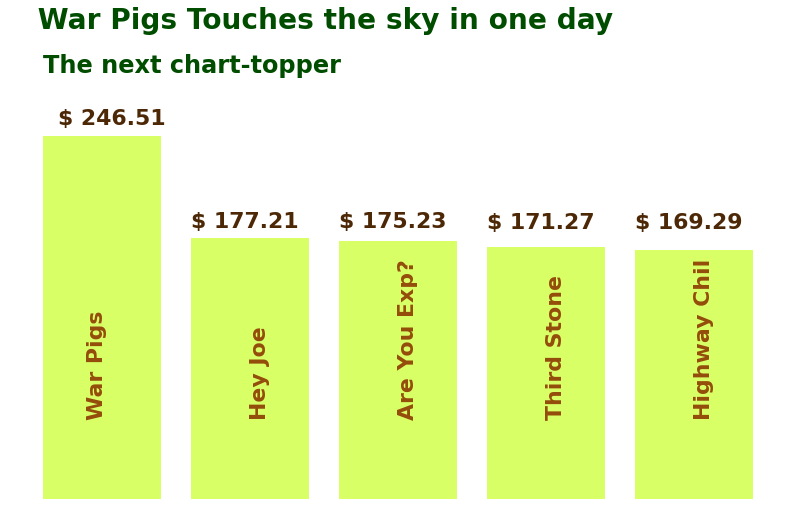

In [108]:
fig, (ax1) = plt.subplots(1,1, figsize = (14,7))
ax1 = plt.bar(data["Track"],data["Amount"], color = "#d9ff66")
plt.xticks([])
plt.yticks([])
pos = ["left","right","top","bottom"]
for i in pos:
    plt.gca().spines[i].set_visible(False)
    
plt.text(-0.1,57, "War Pigs ", rotation = 90, size = 22,color = "#944c0b", weight ="bold")
plt.text(1,57, "Hey Joe  ", rotation = 90,size = 22,color = "#944c0b", weight ="bold")
plt.text(2,57, "Are You Exp?", rotation = 90,size = 22,color = "#944c0b", weight ="bold")
plt.text(3,57, "Third Stone ", rotation = 90,size = 22,color = "#944c0b", weight ="bold")
plt.text(4,57, "Highway Chil", rotation = 90,size = 22,color = "#944c0b", weight ="bold")

plt.text(-0.3,255, "$ 246.51",size = 22, weight ="bold",color = "#4d2806")
plt.text(0.6,185, "$ 177.21",size = 22,weight ="bold",color = "#4d2806")
plt.text(1.6,185, "$ 175.23",size = 22,weight ="bold",color = "#4d2806")
plt.text(2.6,184, "$ 171.27",size = 22,weight ="bold",color = "#4d2806")
plt.text(3.6,184, "$ 169.29",size = 22,weight ="bold",color = "#4d2806")

plt.text(-0.5,320," War Pigs Touches the sky in one day ",weight = "bold",size = 28, color = "#004d00")
plt.text(-0.4,290,"The next chart-topper",weight = "bold",size = 24, color = "#004d00")


plt.show()